In [499]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Preprocessing as pr
from PIL import Image, ImageOps
from skimage import color

In [500]:
#IF INPUT IS JUST NUMBERS: DIGITMODEL
#IF INPUT IS JUST LETTERS: LETTERMODEL
#IF INPUT CONTAINS BOTH: Model
modelname = 'LETTERMODEL'
model = tf.keras.models.load_model(modelname)

In [501]:
def find_letters(image_path):
    # Load the image and convert it to grayscale
    img = cv2.imread(image_path)
    img = cv2.resize(img,(300,300))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image of just the letters
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find the contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours left-to-right, top-to-bottom
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])
    
    return contours, img

In [502]:
#img = cv2.imread('./Test Data/HelloWorld.png')
contours, img = find_letters('./Test Data/helloworld.png')
# Create a copy of the original image with just the first letter isolated
#contours[index] is the one that shows
#hlleo wrold
#sort them by x value but first partition by y
lines = []
bp = 0
if len(contours) > 1:
  diffs = []
  for x in range(1,len(contours)):
    #idea if the difference is a certain percent higher than the average of all the others then new line
    diffs.append(contours[x][0][0][1] - contours[x-1][0][0][1])
    if contours[x][0][0][1] - contours[x-1][0][0][1] > 3*np.mean(diffs):
      lines.append(contours[bp:x])
      bp = x
  lines.append(contours[bp:])
  for l in lines:
      l.sort(key=lambda l: l[0][0][0])



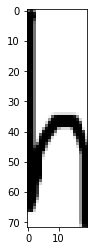

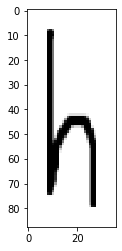

1/1 [==============================] - 0s 151ms/step


'h'

In [503]:
#This Block is for the demo
#lines[line number][letter in the line]
x, y, w, h = cv2.boundingRect(lines[0][0])
letter_img = img[y:y+h, x:x+w]

# Display the result using Matplotlib
plt.imshow(letter_img[:,:,::-1])
plt.show()

imgh = letter_img[:,:,::-1]
imgh = Image.fromarray(imgh)
#adds white border around symbol
imgh = ImageOps.expand(imgh, border=8, fill=(255,255,255))

plt.imshow(imgh)
plt.show()

imgh = pr.preprocess(imgh)
y_pred = model.predict(imgh)
y_pred_class = np.argmax(y_pred, axis=-1)
pr.predDict(y_pred_class[0])


In [504]:
predString = []
for line in range(len(lines)):
  for letter in range(len(lines[line])):
    x, y, w, h = cv2.boundingRect(lines[line][letter])
    letter_img = img[y:y+h, x:x+w]
    imgh = letter_img[:,:,::-1]
    imgh = Image.fromarray(imgh)
    imgh = ImageOps.expand(imgh, border=8, fill=(255,255,255))
    imgh = pr.preprocess(imgh)
    y_pred = model.predict(imgh)
    y_pred_class = np.argmax(y_pred, axis=-1)
    predString.append(pr.predDict(y_pred_class[0]))

1/1 [==============================] - 0s 24ms/step


In [505]:
output = ''.join([str(element) for element in predString])
output = output.lower()
output

'helloworld'